# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
#import cv2
import time

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.1.0'

#### Load Image Data

In [0]:
DATA_LIST = os.listdir('Covid_Data_GradientCrescent')
DATASET_PATH  = 'Covid_Data_GradientCrescent/two/train'
TEST_DIR =  'Covid_Data_GradientCrescent/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [0]:
# raise NotImplementedError("Build your model based on an architecture of your choice "
#                           "A sample model summary is shown below")

model = tf.keras.models.Sequential()

model.add(VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3)))
model.add(Flatten(name="flatten"))
model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.layers[0].trainable=False

model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

#### [5 points] Train Model

In [0]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# raise NotImplementedError("Use the model.fit function to train your network")
# model.fit()
#Adam(decay=1e-3/5)
#loss=tf.keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
t1 = time.time()
history = model.fit(x=train_batches,epochs=NUM_EPOCHS,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_batches, 
          validation_steps=STEP_SIZE_VALID)
t2 = time.time()

11
3


/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 2 steps
Epoch 1/40


/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 7s 727ms/step - loss: 1.9793 - accuracy: 0.6489 - val_loss: 1.9612 - val_accuracy: 0.5500
Epoch 2/40
10/10 [==============================] - 4s 396ms/step - loss: 1.2749 - accuracy: 0.5500 - val_loss: 0.1633 - val_accuracy: 1.0000
Epoch 3/40
10/10 [==============================] - 4s 377ms/step - loss: 0.4578 - accuracy: 0.8191 - val_loss: 0.1832 - val_accuracy: 0.9500
Epoch 4/40
10/10 [==============================] - 4s 376ms/step - loss: 0.2712 - accuracy: 0.9043 - val_loss: 0.2054 - val_accuracy: 0.8500
Epoch 5/40
10/10 [==============================] - 4s 398ms/step - loss: 0.3219 - accuracy: 0.8500 - val_loss: 0.0635 - val_accuracy: 1.0000
Epoch 6/40
10/10 [==============================] - 4s 364ms/step - loss: 0.3128 - accuracy: 0.8723 - val_loss: 0.1127 - val_accuracy: 0.9500
Epoch 7/40
10/10 [==============================] - 4s 366ms/step - loss: 0.2274 - accuracy: 0.9043 - val_loss: 0.0870 - val_accuracy: 1.0000
Epoch 8/40
10/10 

In [0]:
t = t2 - t1
print(t)

158.26326894760132


#### [5 points] Plot Accuracy and Loss During Training

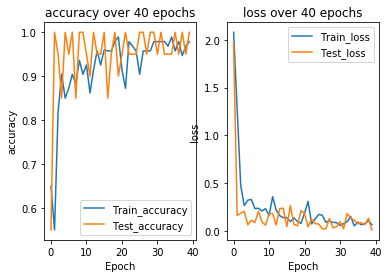

In [0]:
import matplotlib.pyplot as plt

# raise NotImplementedError("Plot the accuracy and the loss during training")

fig, (ax) = plt.subplots(1, 2)

c=0

for i in ['accuracy', 'loss']:
  ax[c].plot(history.history[i], label='Train_'+i)
  ax[c].plot(history.history['val_'+i], label='Test_'+i)
  ax[c].set_xlabel('Epoch')
  ax[c].set_ylabel(i)
  if i=='accuracy':
    ax[c].legend(loc='lower right')
  else:
    ax[c].legend(loc='upper right')

  ax[c].set_title(str(i)+' over '+str(NUM_EPOCHS)+' epochs')
  c+=1

plt.show()

#### Plot Test Results

Found 18 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
18/18 [==============================] - 1s 54ms/step
covid/nejmoa2001191_f3-PA.jpeg


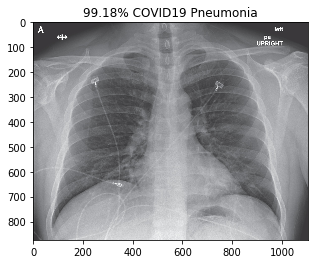

covid/nejmoa2001191_f4.jpeg


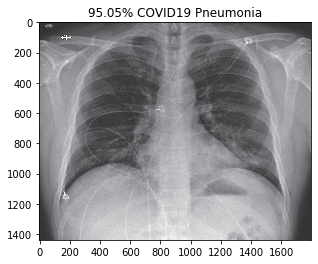

covid/nejmoa2001191_f5-PA.jpeg


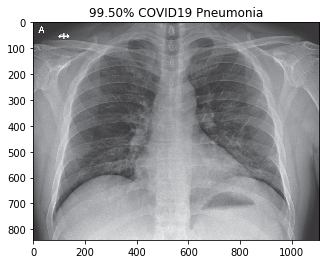

covid/radiol.2020200490.fig3.jpeg


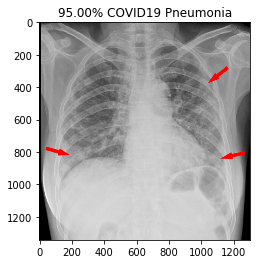

covid/ryct.2020200028.fig1a.jpeg


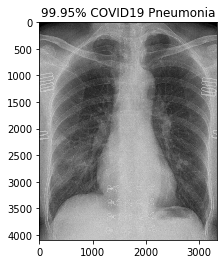

covid/ryct.2020200034.fig2.jpeg


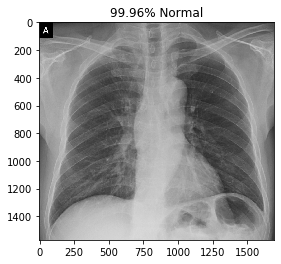

covid/ryct.2020200034.fig5-day0.jpeg


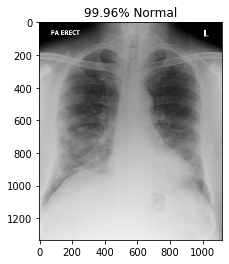

covid/ryct.2020200034.fig5-day4.jpeg


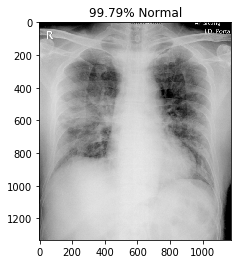

covid/ryct.2020200034.fig5-day7.jpeg


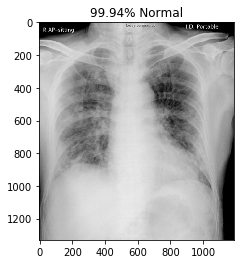

normal/NORMAL2-IM-1385-0001.jpeg


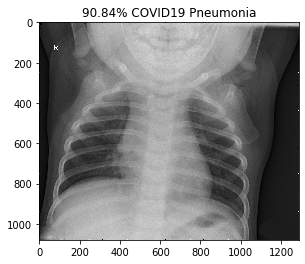

normal/NORMAL2-IM-1396-0001.jpeg


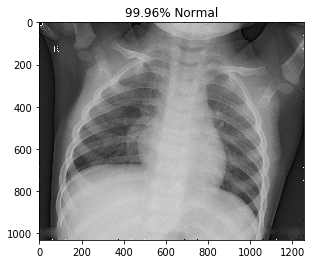

normal/NORMAL2-IM-1400-0001.jpeg


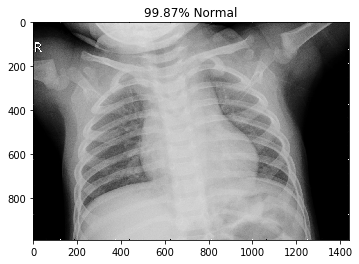

normal/NORMAL2-IM-1401-0001.jpeg


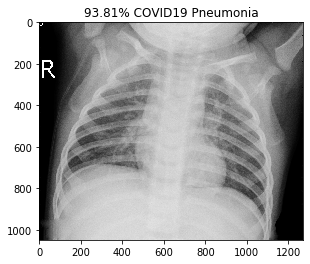

normal/NORMAL2-IM-1406-0001.jpeg


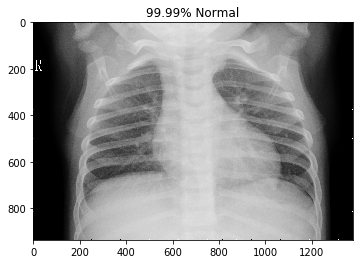

normal/NORMAL2-IM-1412-0001.jpeg


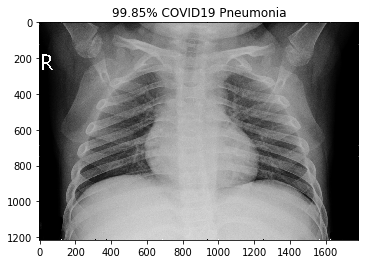

normal/NORMAL2-IM-1419-0001.jpeg


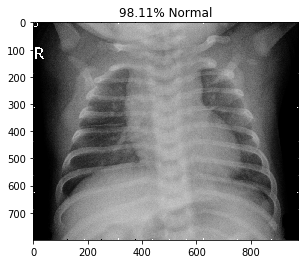

normal/NORMAL2-IM-1422-0001.jpeg


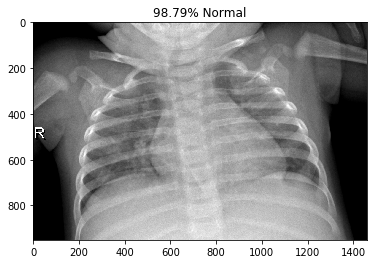

normal/NORMAL2-IM-1423-0001.jpeg


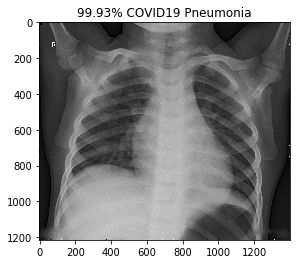

In [0]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

In [0]:
from sklearn.manifold import TSNE

intermediate_layer_model = Model(inputs=model.input,
                                        outputs=model.get_layer('dense').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,seed=42,class_mode="binary")

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the two classes.")


activations = intermediate_layer_model.predict(tsne_data_generator, verbose=1)
tsne = TSNE(n_components=2,random_state=4)
print(activations.shape)
tsne_obj = tsne.fit_transform(activations)


Found 130 images belonging to 2 classes.
5/5 [==============================] - 3s 647ms/step
(130, 256)


(130, 2)


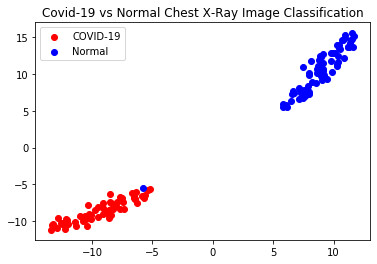

In [0]:
print(tsne_obj.shape)
colors = ['red','blue']
c=[colors[i] for i in tsne_data_generator.labels]
labels = ['COVID-19','Normal']
#l=[labels[i] for i in tsne_data_generator.labels]
labels = {0:"COVID-19",1:"Normal"}

x1 = []
x2 = []
y1 = []
y2 = []

for i in range(tsne_obj.shape[0]):
  if(tsne_data_generator.labels[i]==0):
    x1.append(tsne_obj[i,0])
    y1.append(tsne_obj[i,1])
  else:
    x2.append(tsne_obj[i,1])
    y2.append(tsne_obj[i,0])    


plt.scatter(x1,y1, c="red", label="COVID-19")
plt.scatter(x2,y2, c="blue", label="Normal")
plt.title('Covid-19 vs Normal Chest X-Ray Image Classification')
plt.legend()
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->